<a href="https://colab.research.google.com/github/DavorJordacevic/KERAS-NEURAL-NETWORKS/blob/master/Convolutional_neural_network_with_Keras_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solving a digits classification problem- Convolutional neural network with Keras

Author: Davor Jordačević

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import backend as K
import warnings
from mpl_toolkits import mplot3d
from matplotlib import cm
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, Dropout,Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import adam
from keras.utils import np_utils
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
warnings.filterwarnings("ignore")
K.set_image_data_format('channels_last')
np.random.seed(0)

Using TensorFlow backend.


# 1. Load the digit dataset

In [2]:
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

### 1.1 Spliting data into train and test sets

In [3]:
print(X_digits.shape)
print(y_digits.shape)
print(type(X_digits))
print(type(y_digits))

# Spliting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.33, random_state=42)
X_train = X_train.reshape(X_train.shape[0], 8, 8 , 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 8, 8 , 1).astype('float32')

(1797, 64)
(1797,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### 1.2 Checking the shape of the input data

In [4]:
print('x_train:\t{}' .format(X_train.shape))
print('y_train:\t{}' .format(y_train.shape))
print('x_test:\t\t{}'.format(X_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

x_train:	(1203, 8, 8, 1)
y_train:	(1203,)
x_test:		(594, 8, 8, 1)
y_test:		(594,)


### 1.3 Plot first 64 digits

Now we can plot some digits to see how they look.

digits.target contain real value for each image in digits.images

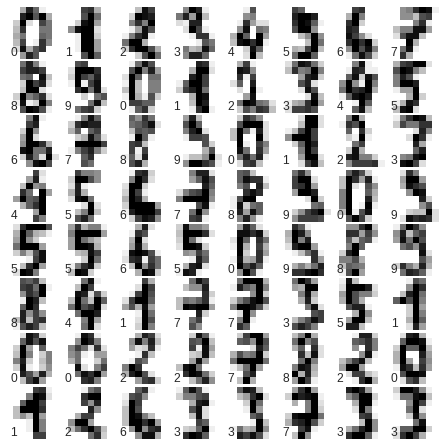

In [5]:
# set up the figure
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

### 1.4 One Hot Encoding

Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.

This means that categorical data must be converted to a numerical form.

In [0]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# 2. Implementing a Neural Network

### 2.1 Hyperparameters

In [0]:
# Hyperparameters
training_epochs = 200 # Total number of training epochs
learning_rate = 0.03 # The learning rate

### 2.2 Creating a model

The optimizer we'll use is **Adam** .It is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based on training data. Adam is a popular algorithm in the field of deep learning because it achieves good results fast. Default parameters follow those provided in the original paper. 

To make this work in keras we need to compile a model. An important choice to make is the loss function. We use the **categorical_crossentropy** loss because it measures the probability error in discrete classification tasks in which the classes are mutually exclusive (each entry is in exactly one class).

In [8]:
# create a model
def create_model():
  model = Sequential()
  model.add(Conv2D(64,input_shape=(8,8,1),padding="same", kernel_size=(3, 3),activation='relu'))
  model.add(Dropout(0.2))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(10, activation='softmax'))
 
  # Compile a model
  model.compile(loss='categorical_crossentropy', optimizer=adam(learning_rate), metrics=['accuracy'])
  return model
model = create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 8, 8, 64)          640       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                65600     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
__________

### 2.3 Train the model

Let's trains the model for a given number of epochs.

In [0]:
results = model.fit(
 X_train, y_train,
 epochs= training_epochs,
 batch_size = 128,
 validation_data = (X_test, y_test),
 verbose = 0
)

### 2.4 Test the model

Model can generate output predictions for the input samples.

In [0]:
prediction_values = model.predict_classes(X_test)

### 2.5 Accuracy

Test-Accuracy :

In [11]:
print("Test-Accuracy:","%.2f%%" % (np.mean(results.history["val_acc"])*100))

Test-Accuracy: 94.81%


### 2.6 Evaluate the model to see the accuracy

Now we can check the accuracy of our model

In [12]:
print("Evaluating on training set...")
(loss, accuracy) = model.evaluate(X_train,y_train)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))


print("Evaluating on testing set...")
(loss, accuracy) = model.evaluate(X_test, y_test)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Evaluating on training set...
1203/1203 [==============================] - 0s 72us/step
loss=0.0773, accuracy: 98.1712%
Evaluating on testing set...
594/594 [==============================] - 0s 66us/step
loss=0.1452, accuracy: 96.2963%


### 2.7 Summarize history for accuracy

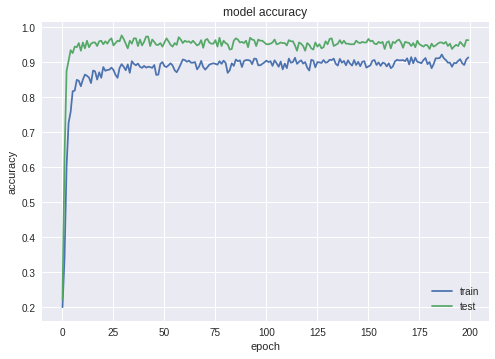

In [13]:
# summarize history for accuracy
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='down right')

### 2.8 Summarize history for loss

Maximum Loss : 9.1798

Minimum Loss : 0.2667

Loss difference : 8.9132


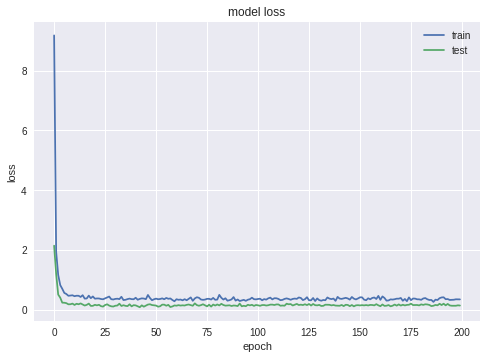

In [14]:
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("")
print("Minimum Loss : {:.4f}".format(min_loss))
print("")
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

# 3. Visualization

### 3.3 Display the test set and predictions

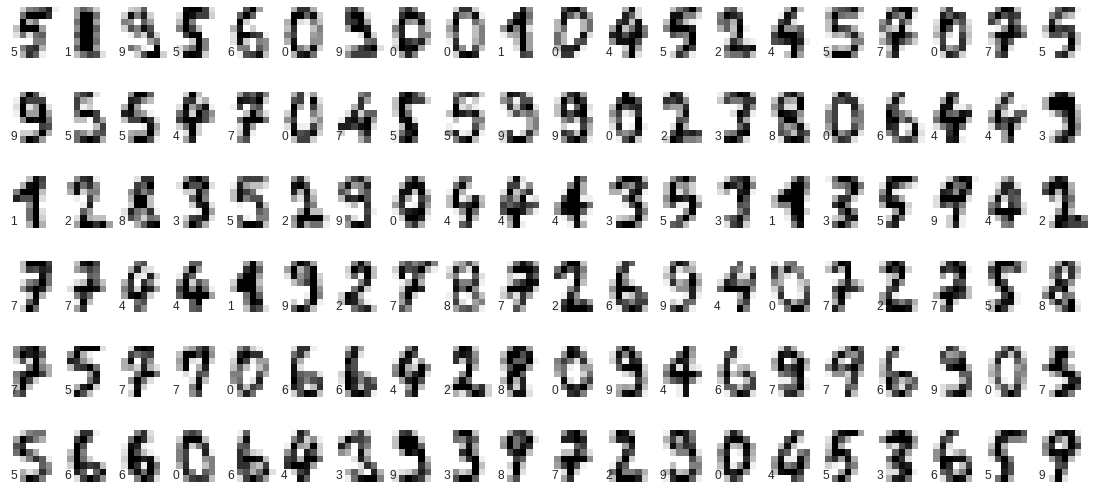

In [15]:
# set up the figure
fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(120):
    ax = fig.add_subplot(6, 20, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i+50,:].reshape((8,8)),cmap=plt.cm.gray_r, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(prediction_values[i+50]))

# 4. Test out model

### 4.1 Import files

In google colab we can import files through the following commands:

In [0]:
#from google.colab import files
#files.upload()

### 4.2 Reshape pictures

In order to transfer the image to the grayscale, we will do the following:

In [0]:
#import cv2
#image = cv2.imread('broj_4_2.png') 
#grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#imagem = cv2.bitwise_not(image)
#plt.imshow(imagem[:,:,0])

### 4.3 Predict values

Test out model on imported picture:

In [0]:
#predict = model.predict_classes(imagem[:,:,0].reshape(1,8,8,1))
#print(predict)

# 5. Save a model as picture and pdf

### 5.1 Import required libraries

In [0]:
!pip install ann_visualizer
!apt-get install xdg-utils
from keras.utils import plot_model
from IPython.display import clear_output
from ann_visualizer.visualize import ann_viz;
clear_output()

### 5.2 Save a model as png picture

In [0]:
plot_model(model,show_shapes=True,show_layer_names=False, to_file='model.png')

### 5.3 Same a model as pdf

In [0]:
#ann_viz(model, title="Solving a digits classification problem- Convolutional neural network with Keras")



---



---


For more informations, visit http://datahacker.rs/ .

For more examples, visit https://github.com/DavorJordacevic.


---



---
